In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Activation, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras import callbacks
from sklearn.metrics import precision_score,recall_score,confusion_matrix, classification_report, accuracy_score,f1_score
from gc import callbacks
from pickletools import optimize
from tabnanny import verbose
from typing import Sequence
from sklearn.preprocessing import scale,StandardScaler
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import cifar100
import tensorflow as tf
from tensorflow.keras import datasets,layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers.core import Flatten
from tensorflow.keras.optimizers import RMSprop
from skimage import color
from tensorflow.keras.optimizers import RMSprop, SGD

In [2]:


(X_train, y_train),(X_test,y_test) = cifar100.load_data()



169017344/169001437 [==============================] - 3s 0us/step


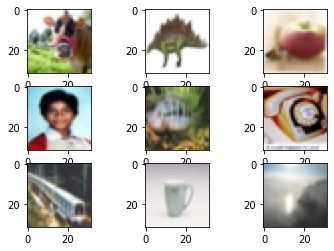

In [3]:

for i in range(9):
  plt.subplot(330+i+1 )
  plt.imshow(X_train[i],cmap = plt.get_cmap('gray'))
  
plt.show()

In [6]:
X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(50000, 32, 32)
(10000, 32, 32)


In [7]:
X_train = color.rgb2gray(X_train)
print(X_train.shape)
X_test = color.rgb2gray(X_test)
print(X_test.shape)
X = X_test

(50000, 32)
(10000, 32)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
from keras.utils import np_utils



X_train = X_train.reshape (50000,32)
X_test = X_test.reshape(10000,32)


X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train/=255
X_test/=255

y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32)
(10000, 32)
(50000, 100)
(10000, 100)


In [19]:
model = tf.keras.Sequential()
model.add(Flatten())
model.add(Dense(1024,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(512,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(256,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(128,activation='relu',kernel_initializer= 'he_uniform'))
model.add(Dense(100,activation='sigmoid'))
#opt = SGD(lr = 0.01,momentum=0.9)

model.compile(loss='categorical_crossentropy', optimizer= SGD(), metrics=['accuracy'])
history = model.fit(X_train,y_train, batch_size=128,epochs=500,verbose=1,validation_data = (X_test, y_test))

Epoch 1/500
391/391 [==============================] - 9s 21ms/step - loss: 4.6050 - accuracy: 0.0100 - val_loss: 4.6048 - val_accuracy: 0.0105
Epoch 2/500
391/391 [==============================] - 8s 20ms/step - loss: 4.6047 - accuracy: 0.0106 - val_loss: 4.6046 - val_accuracy: 0.0099
Epoch 3/500
391/391 [==============================] - 8s 20ms/step - loss: 4.6046 - accuracy: 0.0127 - val_loss: 4.6044 - val_accuracy: 0.0144
Epoch 4/500
391/391 [==============================] - 8s 20ms/step - loss: 4.6044 - accuracy: 0.0116 - val_loss: 4.6043 - val_accuracy: 0.0110
Epoch 5/500
391/391 [==============================] - 8s 20ms/step - loss: 4.6043 - accuracy: 0.0115 - val_loss: 4.6042 - val_accuracy: 0.0116
Epoch 6/500
391/391 [==============================] - 8s 20ms/step - loss: 4.6043 - accuracy: 0.0123 - val_loss: 4.6042 - val_accuracy: 0.0130
Epoch 7/500
391/391 [==============================] - 8s 20ms/step - loss: 4.6042 - accuracy: 0.0132 - val_loss: 4.6041 - val_accuracy:

In [20]:
score = model.evaluate(X_test,y_test,verbose=0)
print('Test loss: ',score[0])
print('test accuraccy',score[1])

Test loss:  4.423151016235352
test accuraccy 0.032999999821186066


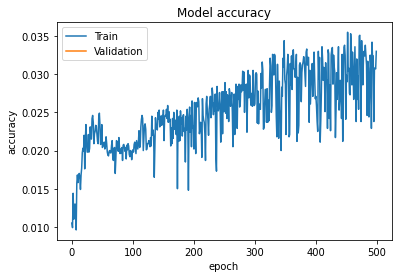

In [21]:
plt.plot([history.history['accuracy']])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc = 'upper left')